In [1]:
# importing general libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:}".format

## Reading the dataset into dataframe

In [2]:
housing = pd.read_csv(".\data\housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Data Understanding

In [3]:
# shape of the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


- We have 545 entries 13 columns
- Target: price


### Data Analysis

##### Numerical Variables

In [4]:
housing_numvars = housing.select_dtypes('int')
housing_numvars.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


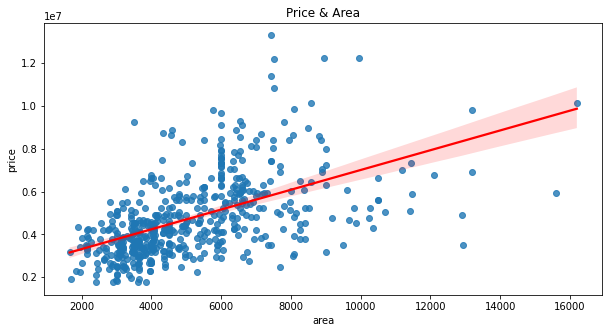

In [5]:
# Area - it is the area of the house 
# Lets plot area vs price to see how it affects our target variable
plt.figure(figsize=(10,5))
sns.regplot(x='area',y='price',data=housing_numvars,line_kws={'color':'red'})
plt.title('Price & Area')
plt.show()

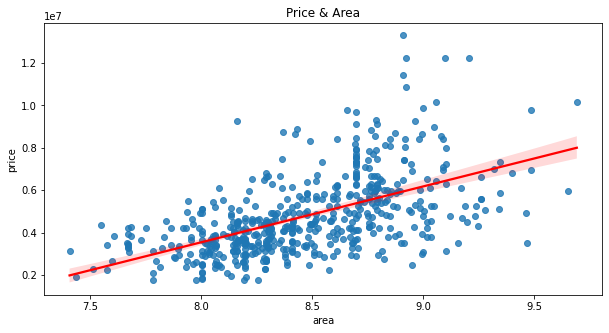

In [25]:
plt.figure(figsize=(10,5))
sns.regplot(x=np.log(housing_numvars['area']),y=housing_numvars['price'],line_kws={'color':'red'})
plt.title('Price & Area')
plt.show()

- See price increases with price increases but there is some other influencer definitely present
- For example, we can see there is a point at 16000 area but the price is significantly lower than 8000/10000 sqft areas
- there is some factors that some houses between 8000 and 10000 are very high
- After a certain point the relationship is literally random

In [6]:
housing_numvars[['price','area']].describe()

,price,area
count,545.0,545.0
mean,4766729.247706422,5150.54128440367
std,1870439.6156573922,2170.141022508803
min,1750000.0,1650.0
25%,3430000.0,3600.0
50%,4340000.0,4600.0
75%,5740000.0,6360.0
max,13300000.0,16200.0


- There is too much variance in price as well as in area which needs to be scaled 


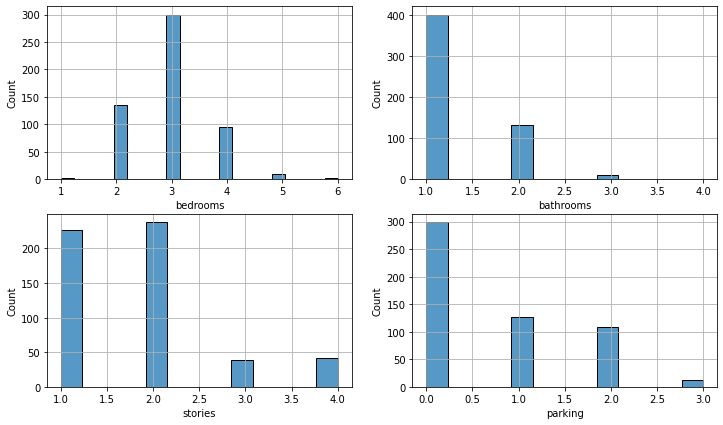

In [7]:
# Let us study the next variables : 'bedrooms', 'bathrooms', 'stories', 'parking'
plt.figure(figsize=(12,7))
for i,j in enumerate(['bedrooms', 'bathrooms', 'stories', 'parking']):
    plt.subplot(2,2,i+1)
    sns.histplot(housing_numvars[j])
    plt.grid()
plt.show()


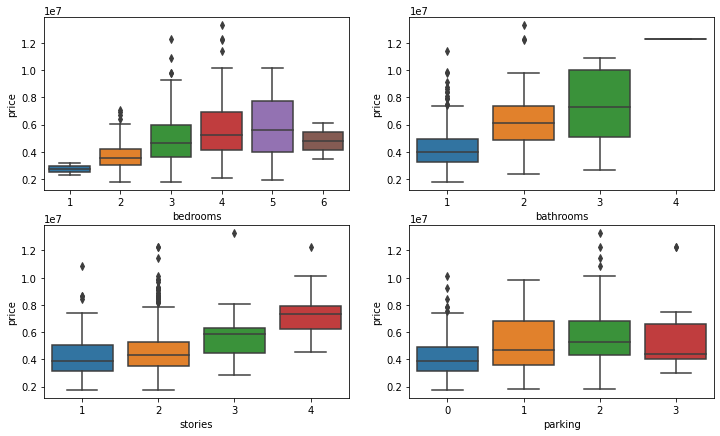

In [8]:
# How each variables affect the price?
plt.figure(figsize=(12,7))
for i,j in enumerate(['bedrooms', 'bathrooms', 'stories', 'parking']):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=j,y='price',data=housing_numvars)
plt.show()


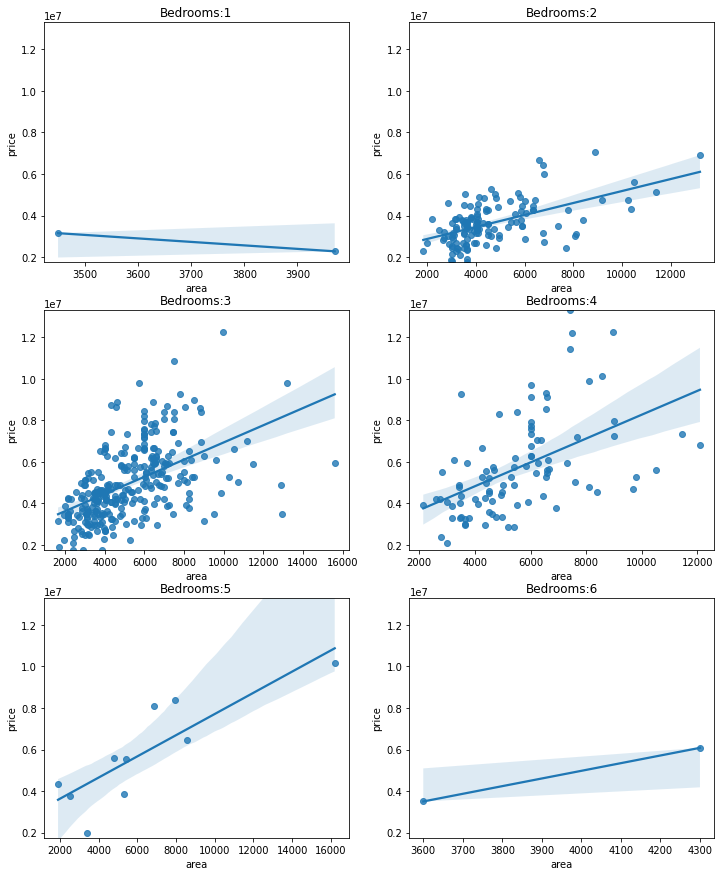

In [9]:
# How bedroom affects area and price?

plt.figure(figsize=(12,15))
for i in range(1,7):
    plt.subplot(3,2,i)
    sns.regplot(x='area',y='price',data=housing_numvars[housing_numvars['bedrooms']==i])
    plt.ylim((1750000,13300000))
    plt.title('Bedrooms:'+str(i))
plt.show()


- More bedrooms with higher area definitely increasing the price
- But the bedrooms for area and price in each cases are mostly overlapped 


2    395
1    138
3     12
Name: bedrooms_cat, dtype: int64


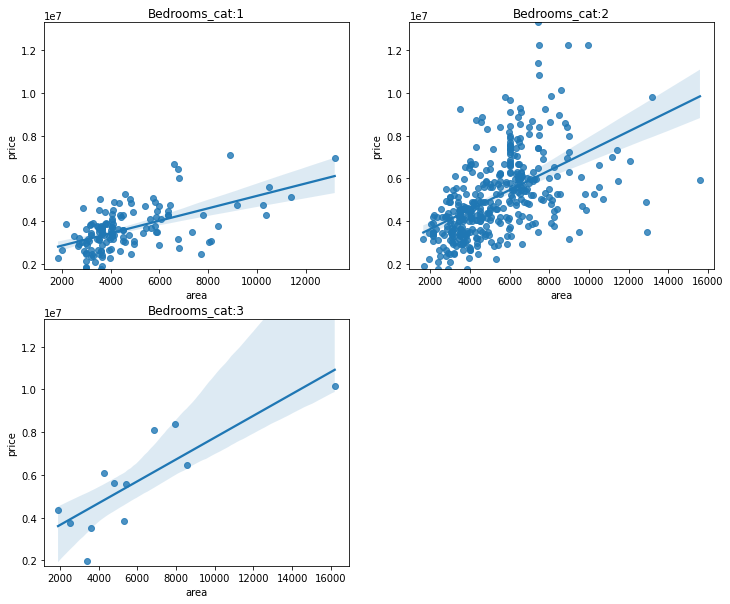

In [29]:
# what if we convert this variables into categories 1-2 : 1, 3-4 : 2, 5-6 : 3
def bedroom(val):
    if val<=2 :
        return 1
    elif val>=2 and val<=4 :
        return 2
    else:
        return 3

housing_numvars['bedrooms_cat'] = housing_numvars['bedrooms'].map(lambda x: bedroom(x))
print(housing_numvars['bedrooms_cat'].value_counts())

plt.figure(figsize=(12,10))
for i in range(1,4):
    plt.subplot(2,2,i)
    sns.regplot(x='area',y='price',data=housing_numvars[housing_numvars['bedrooms_cat']==i])
    plt.ylim((1750000,13300000))
    plt.title('Bedrooms_cat:'+str(i))
plt.show()



##### Let us understand the variable bathrooms
- previously, we have seen that bathrooms is a significant variable to affect price


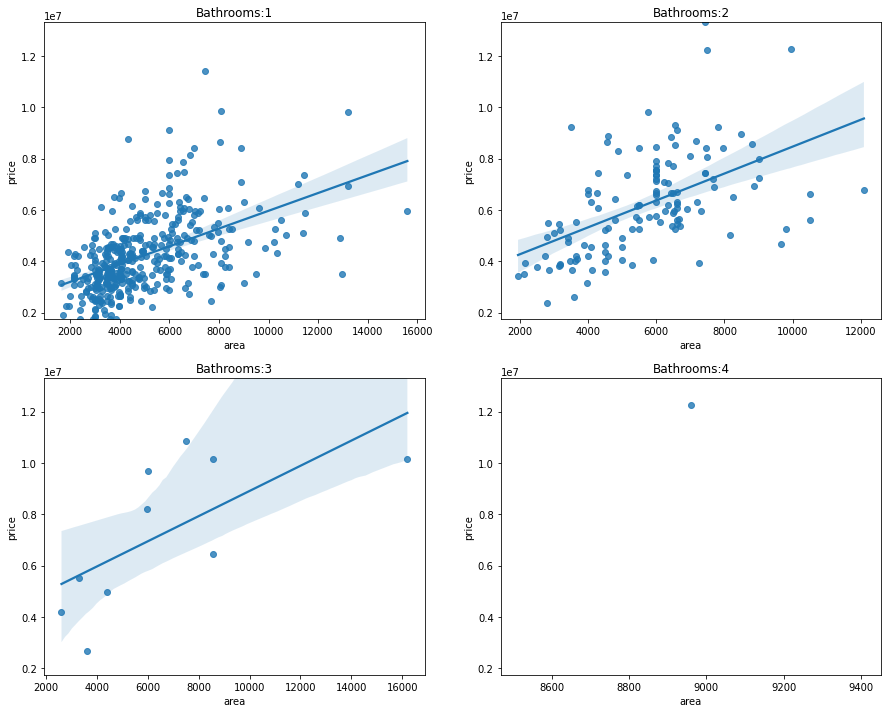

In [12]:
# How bathrooms affects area and price?

plt.figure(figsize=(15,12))
for i in range(1,5):
    plt.subplot(2,2,i)
    sns.regplot(x='area',y='price',data=housing_numvars[housing_numvars['bathrooms']==i])
    plt.ylim((1750000,13300000))
    plt.title('Bathrooms:'+str(i))
plt.show()


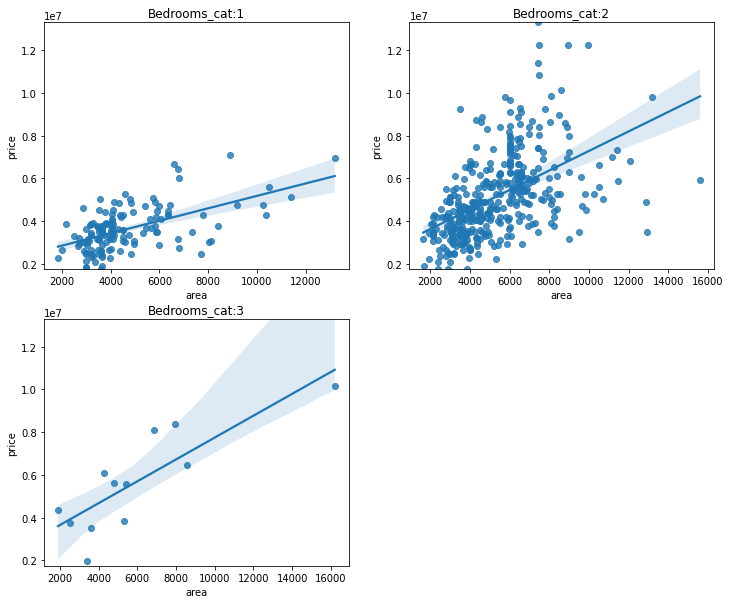

In [30]:
# What if we create new variables  for bathrooms 1 :1, 2 :2,>2: 3
housing_numvars['bathrooms_cat'] = housing_numvars['bathrooms'].map(lambda x: 3 if (x>2) else x)

plt.figure(figsize=(12,10))
for i in range(1,4):
    plt.subplot(2,2,i)
    sns.regplot(x='area',y='price',data=housing_numvars[housing_numvars['bedrooms_cat']==i])
    plt.ylim((1750000,13300000))
    plt.title('Bedrooms_cat:'+str(i))
plt.show()


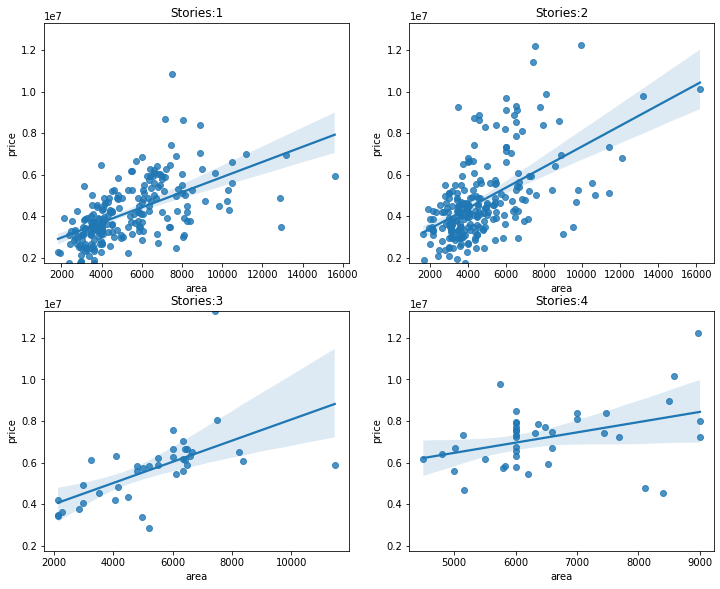

In [14]:
# Studying other variables - stories and parking

plt.figure(figsize=(12,15))
for i in range(0,5):
    plt.subplot(2,2,i)
    sns.regplot(x='area',y='price',data=housing_numvars[housing_numvars['stories']==i])
    plt.ylim((1750000,13300000))
    plt.title('Stories:'+str(i))
plt.show()


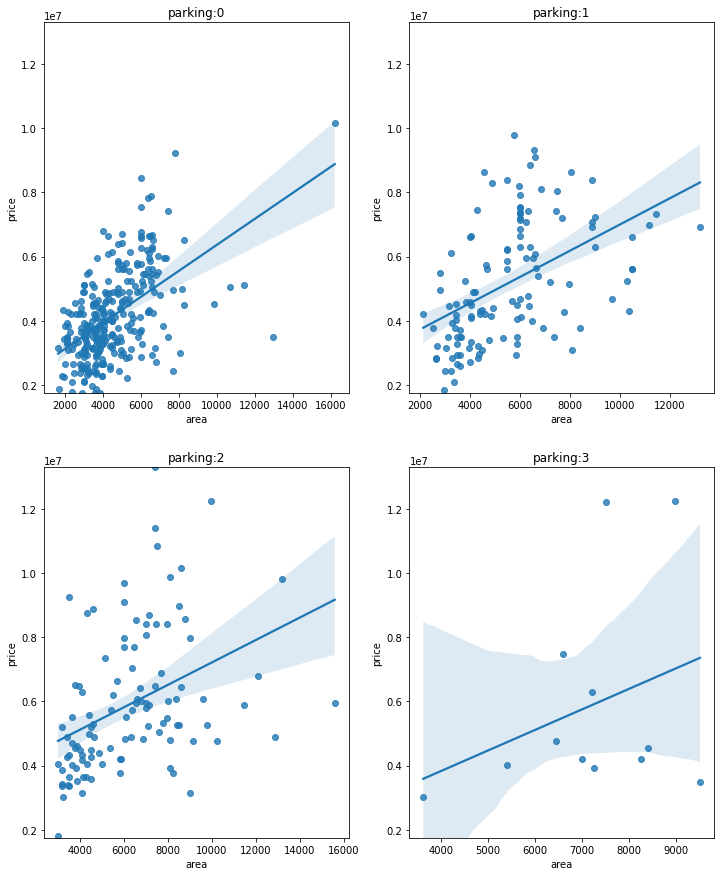

In [22]:
###### Studying other variables - stories and parking

plt.figure(figsize=(12,15))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    sns.regplot(x='area',y='price',data=housing_numvars[housing_numvars['parking']==i])
    plt.ylim((1750000,13300000))
    plt.title('parking:'+str(i))
plt.show()


### Analyzing Categorical Variables